In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [3]:
# 데이터 확인
print(display(train.head(3)))
print(test.head(3))
print(submission.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


None
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
   PassengerId  Survived
0          892         0
1          893         1
2          894         0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


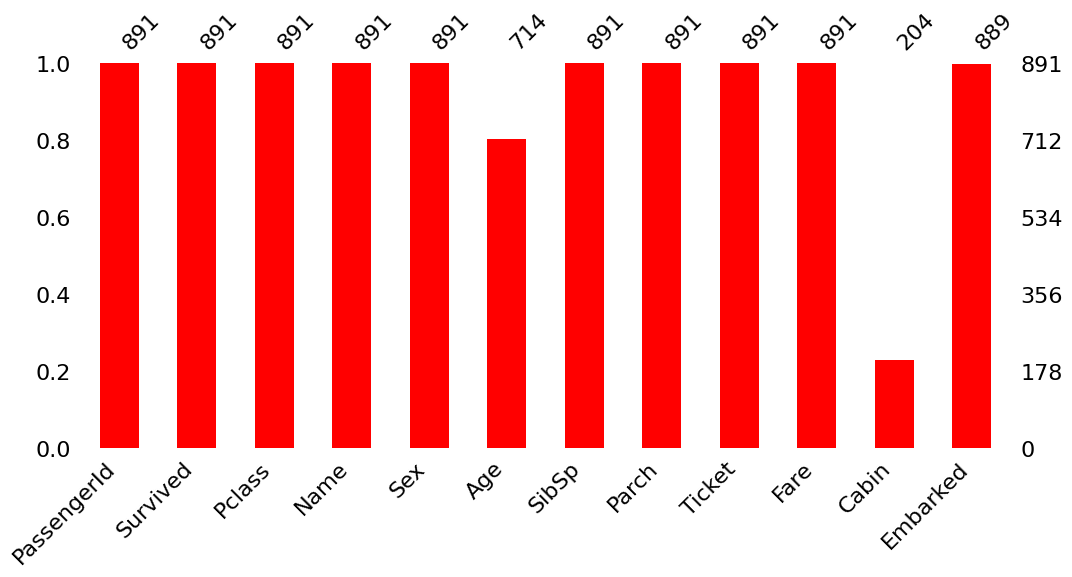

In [6]:
import missingno as msno
msno.bar(train, figsize=(12,5), color='red')
plt.show()

In [7]:
num_cols = train.select_dtypes(exclude='object')
num_cols

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


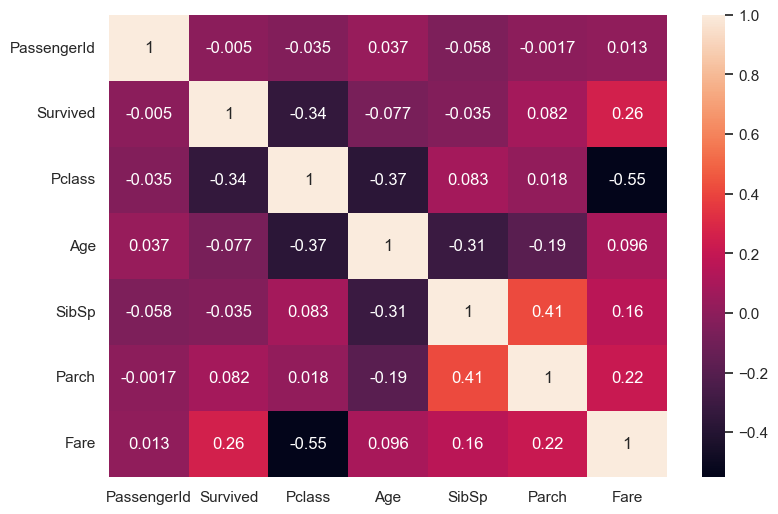

In [8]:
plt.figure(figsize=(9,6))
sns.set(font_scale=1)
sns.heatmap(num_cols.corr(), annot=True, cbar=True)
plt.show()

In [9]:
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis=0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [10]:
data_num = data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mean())

selected_feature = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x_train = data_num.loc[data['TrainSplit'] == 'Train', selected_feature]
y_train = data_num.loc[data['TrainSplit'] == 'Train', 'Survived']

x_test = data_num.loc[data['TrainSplit'] == 'Test', selected_feature]
print("Train 데이터셋 크기 :", x_train.shape, y_train.shape)
print("Test 데이터셋 크기 :", x_test.shape)

Train 데이터셋 크기 : (891, 5) (891,)
Test 데이터셋 크기 : (418, 5)


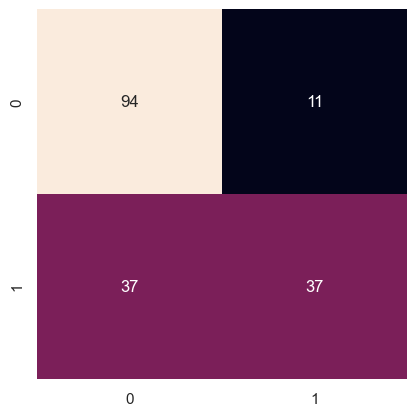

In [11]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=42)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cbar=False, square=True)
plt.show()

In [14]:
# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print(accuracy_score(y_val, y_val_pred))
print(precision_score(y_val, y_val_pred))
print(recall_score(y_val, y_val_pred))
print(f1_score(y_val, y_val_pred))
print(roc_auc_score(y_val, y_val_pred))

0.7318435754189944
0.7708333333333334
0.5
0.6065573770491803
0.6976190476190477


In [15]:
y_test_pred = lr_model.predict(x_test)

submission['Survived'] = y_test_pred.astype(int)

In [16]:
train['Survived'].value_counts(dropna=False)

Survived
0    549
1    342
Name: count, dtype: int64

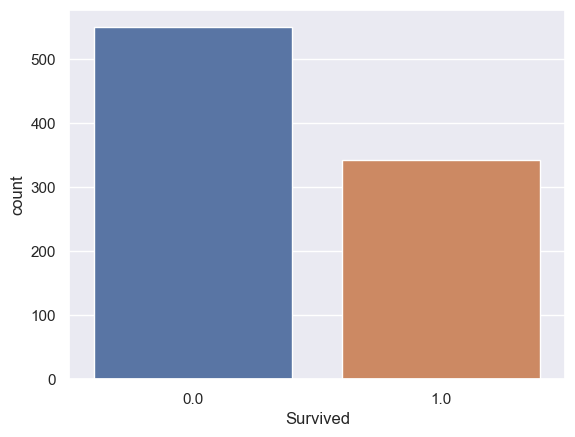

In [17]:
sns.countplot(x='Survived', data=data)
plt.show()

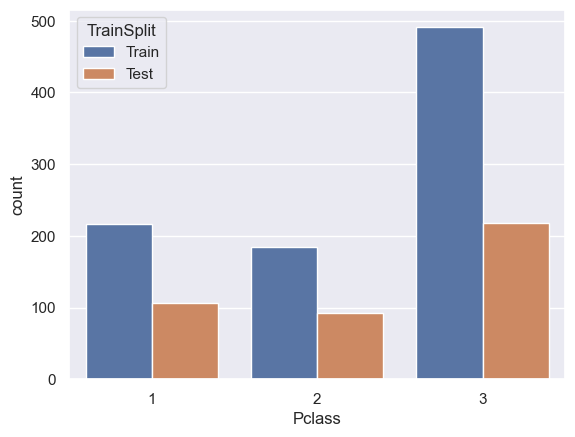

In [19]:
sns.countplot(x='Pclass', hue='TrainSplit', data=data)
plt.show()

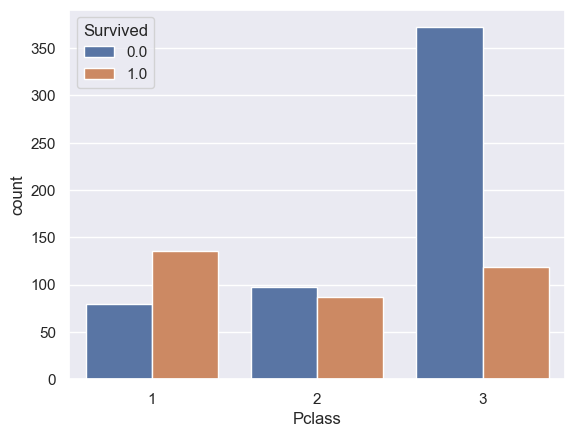

In [21]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.show()

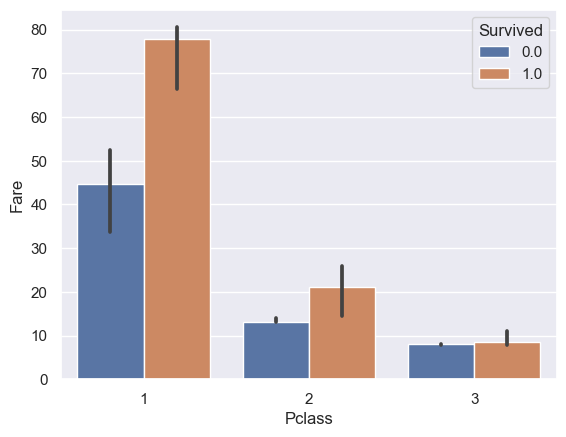

In [23]:
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=data, estimator=np.median)
plt.show()

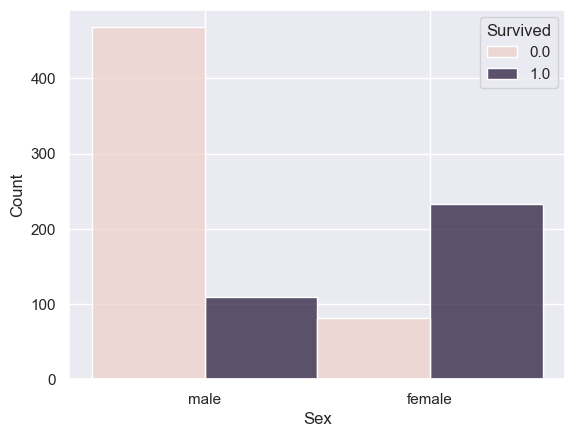

In [24]:
sns.histplot(x='Sex', hue='Survived', multiple='dodge', data=data)
plt.show()

In [25]:
data.loc[data['Sex'] == 'female', 'Sex'] = 0
data.loc[data['Sex'] == 'male', 'Sex'] = 1
data['Sex'] = data['Sex'].astype(int)

data['Sex'].value_counts(dropna=False)

Sex
1    843
0    466
Name: count, dtype: int64

In [26]:
title_name = data['Name'].str.split(",", expand=True)[1]
title_name

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: 1, Length: 1309, dtype: object

In [27]:
title = title_name.str.split(".", expand=True)[0]
title.value_counts(dropna=False)

0
 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: count, dtype: int64

In [28]:
title = title.replace(['Ms'], 'Miss', regex=True)
title = title.replace(['Mlle', 'the Countess', 'Lady', 'Don', 'Dona', 'Mme', 'Sir', 'Jonkheer', 'Noblea'], 'Noble', regex=True)
title = title.replace(['Col', 'Major', 'Capt'], 'Officer', regex=True)
title = title.replace(['Dr', 'Rev'], 'Priest', regex=True)
data['Title'] = np.array(title)
data['Title'].value_counts(dropna=False)

Title
 Mr         757
 Miss       262
 Mrs        197
 Master      61
 Priest      16
 Noble        8
 Officer      7
 Noblea       1
Name: count, dtype: int64

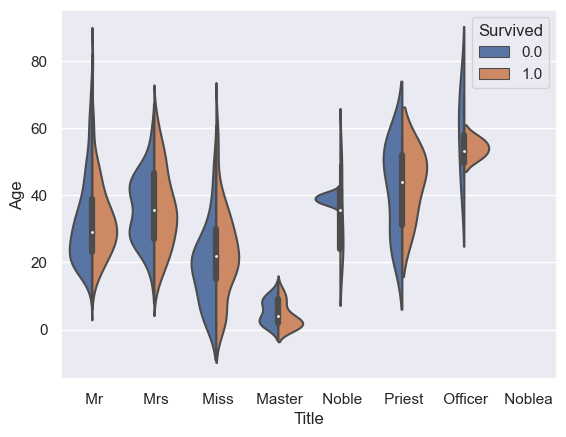

In [29]:
sns.violinplot(x='Title', y='Age', hue='Survived', data=data, split=True)
plt.show()

In [32]:
data = data.drop(['Name'], axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

In [36]:
for title in data['Title'].unique():
    print("%s 결측값 개수 : " % title, data.loc[data['Title'] == title, 'Age'].isnull().sum())
    age_med = data.loc[data['Title'] == title, 'Age'].mean()
    data.loc[data['Title'] == title, 'Age'] = data.loc[data['Title'] == title, 'Age'].fillna(age_med)
print('\n')
print("Age 열의 평균값 개수 :", data['Age'].isnull().sum())

 Mr 결측값 개수 :  0
 Mrs 결측값 개수 :  0
 Miss 결측값 개수 :  0
 Master 결측값 개수 :  0
 Noble 결측값 개수 :  0
 Priest 결측값 개수 :  0
 Officer 결측값 개수 :  0
 Noblea 결측값 개수 :  0


Age 열의 평균값 개수 : 0


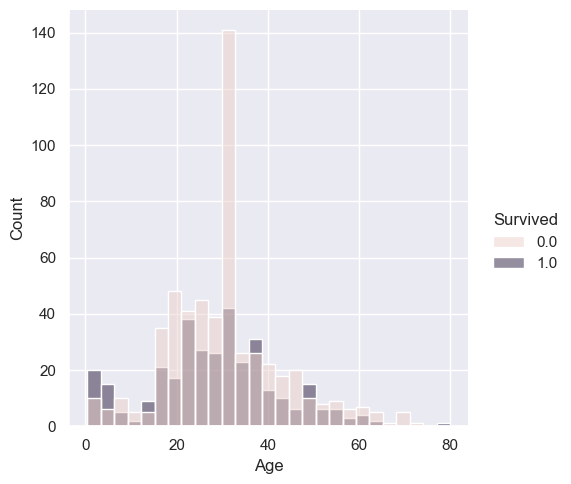

In [39]:
sns.displot(x='Age', kind='hist', hue='Survived',
            data=data)
plt.show()

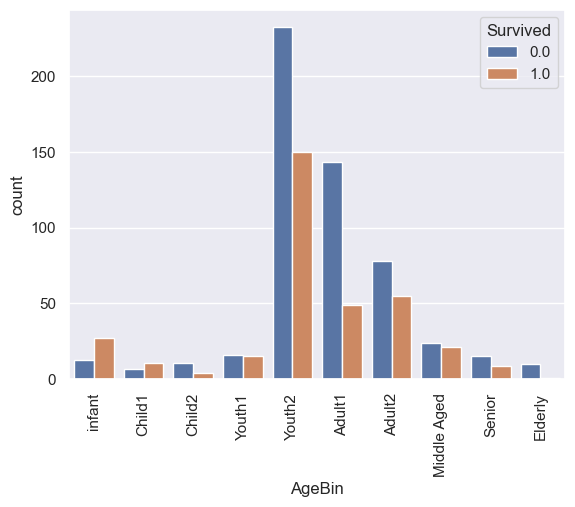

In [41]:
bins = [0,4,8,12,16,32,36,48,56,64,100]
labels = ['infant', 'Child1', 'Child2', 'Youth1', 'Youth2', 'Adult1', 'Adult2', 'Middle Aged', 'Senior', 'Elderly']
data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)

sns.countplot(x='AgeBin', hue='Survived', data=data)
plt.xticks(rotation=90)
plt.show()


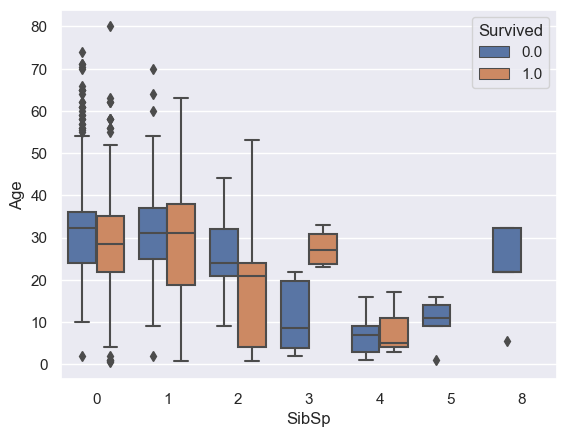

In [42]:
sns.boxplot(x='SibSp', y='Age', hue='Survived', data=data)
plt.show()

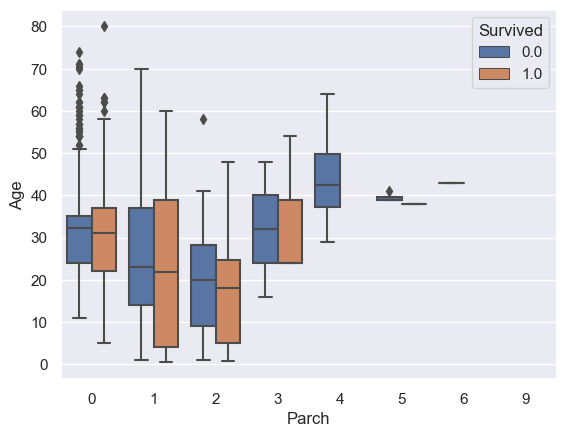

In [43]:
sns.boxplot(x='Parch', y='Age', hue='Survived', data=data)
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


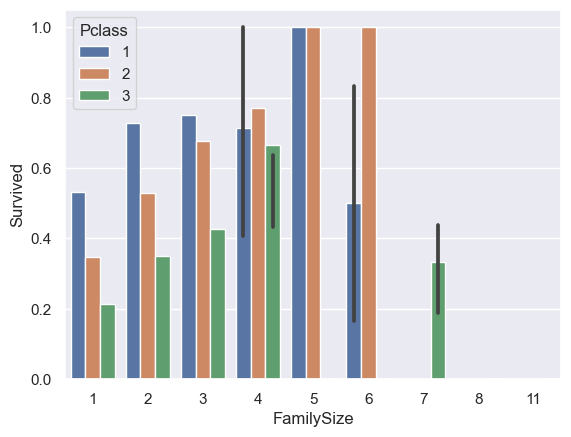

In [45]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', hue='Pclass', estimator=np.mean, data=data)
plt.show()

In [46]:
data.loc[data['Fare'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamliySize,FamilySize
152,1044,NaN,3,1,60.5,0,0,3701,NaN,NaN,S,Test,Mr,Senior,1,1


In [47]:
# 3등석 요금의 평균값을 가지고 결측값 대체
p3_fare_mean = data.loc[data['Pclass']==3, 'Fare'].mean()
# print(p3_fare_mean)
data['Fare'] = data['Fare'].fillna(p3_fare_mean)
data.loc[data['PassengerId']==1044, :'Fare']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
152,1044,NaN,3,1,60.5,0,0,3701,13.302889


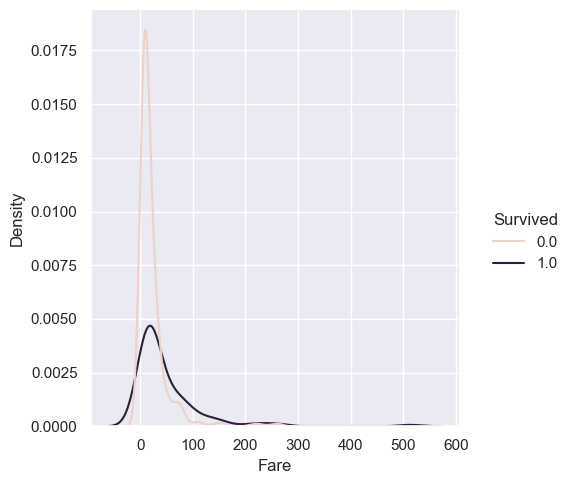

In [49]:
sns.displot(x='Fare', kind='kde', hue='Survived', data=data)
plt.show()

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
413    2.202765
414    4.699571
415    2.110213
416    2.202765
417    3.150952
Name: FareLog, Length: 1309, dtype: float64


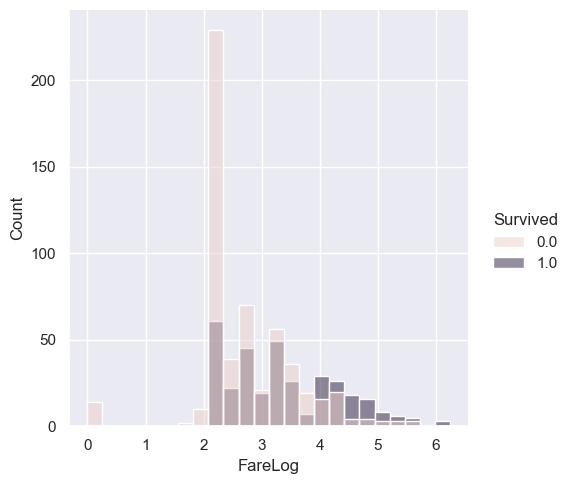

In [50]:
# log 변환
data['FareLog'] = np.log1p(data['Fare'])
print(data['FareLog'])
sns.displot(x='FareLog', kind='hist', hue='Survived', data=data)
plt.show()

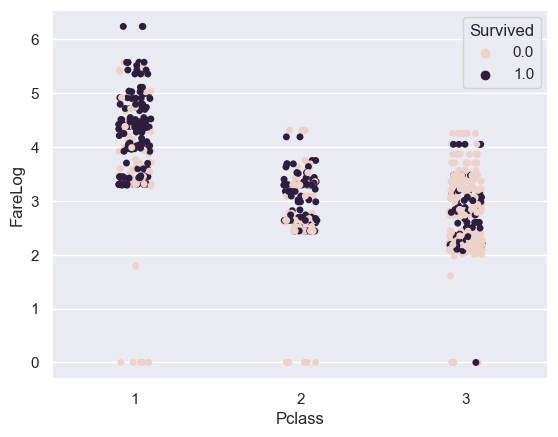

In [51]:
sns.stripplot(x='Pclass', y='FareLog', hue='Survived', data=data)
plt.show()

In [52]:
# 결측값 확인
data.loc[data['Embarked'].isnull(), :]
# 탑승 항구를 나타내는 Embarked 열의 결측값은 2개로 확인된다.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamliySize,FamilySize,FareLog
61,62,1.0,1,0,38.0,0,0,113572,80.0,B28,NaN,Train,Miss,Adult2,1,1,4.394449
829,830,1.0,1,0,62.0,0,0,113572,80.0,B28,NaN,Train,Mrs,Senior,1,1,4.394449


In [54]:
print(data['Embarked'].mode())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())
data['Embarked'].value_counts(dropna=False)

0    S
Name: Embarked, dtype: object


Embarked
S      914
C      270
Q      123
NaN      2
Name: count, dtype: int64

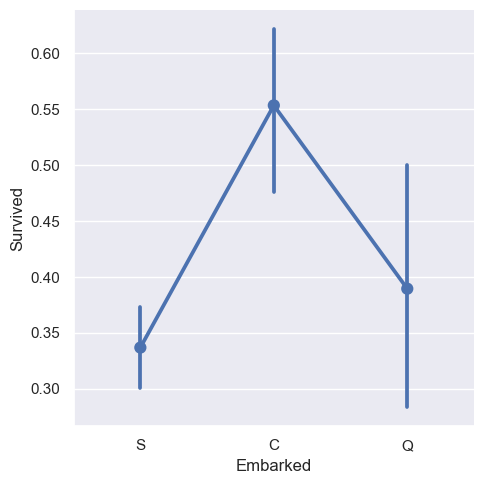

In [56]:
sns.catplot(x='Embarked', y='Survived', kind='point', data=data)
plt.show()

In [57]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [58]:
data['Cabin'].str.slice(0,1).value_counts(dropna=False)

Cabin
NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: count, dtype: int64

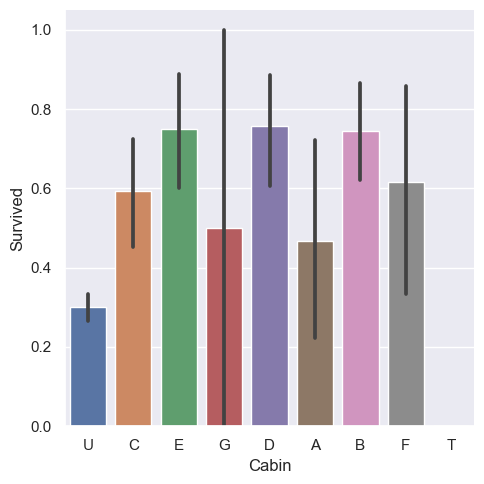

In [59]:
data['Cabin'] = data['Cabin'].str.slice(0,1)
data['Cabin'] = data['Cabin'].fillna("U")

sns.catplot(x='Cabin', y='Survived', kind='bar', data=data)
plt.show()

In [60]:
data['Ticket'].value_counts(dropna=False)

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

In [61]:
data['Ticket'] = data['Ticket'].str.replace(",", "").str.replace("/","")
data['Ticket'] = data['Ticket'].str.strip().str.split(' ').str[0]
data['Ticket'].value_counts(dropna=False)

Ticket
PC           92
C.A.         46
SOTONO.Q.    16
W.C.         14
STONO        14
             ..
3460          1
350060        1
239854        1
4134          1
359309        1
Name: count, Length: 753, dtype: int64

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


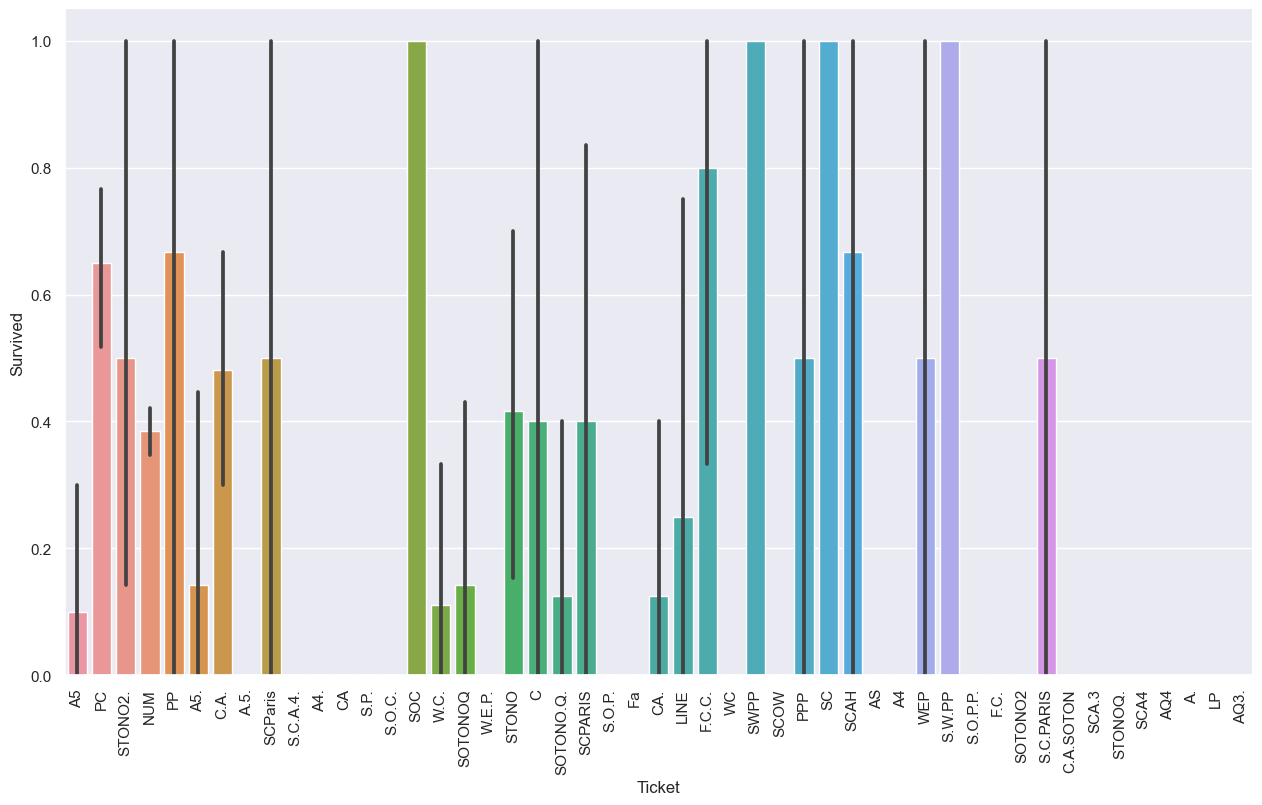

In [62]:
data.loc[data['Ticket'].str.isdigit(), 'Ticket'] = "NUM"
data['Ticket'].value_counts(dropna=False)[:10]

fig = sns.catplot(x='Ticket', y='Survived', kind='bar', data=data)
fig.fig.set_size_inches(15,8)
plt.xticks(rotation=90)
plt.show()

In [63]:
from sklearn.preprocessing import LabelEncoder
for col in ['Title', 'AgeBin']:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

data.loc[:, ['Title', 'AgeBin']].head()

,Title,AgeBin
0,2,8
1,3,1
2,1,8
3,3,0
4,2,0


In [64]:
onehot_prefix = []
for col in ['Embarked', 'Cabin', 'Ticket']:
    data[col] = data[col].astype('category')
    data = pd.get_dummies(data, columns=[col], prefix=col[:3], drop_first=True)
    onehot_prefix.append(col[:3])
data.loc[:, [col for col in data.columns if col[:3] in onehot_prefix]].head()

,Emb_Q,Emb_S,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,Cab_U,...,Tic_SOTONO2,Tic_SOTONOQ,Tic_STONO,Tic_STONO2.,Tic_STONOQ.,Tic_SWPP,Tic_W.C.,Tic_W.E.P.,Tic_WC,Tic_WEP
0,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_cols = [col for col in data.loc[:, 'Pclass':].columns if col != 'TrainSplit']
data_scaled = data.loc[:, scaled_cols]
data_scaled = scaler.fit_transform(data_scaled)
data.loc[:, scaled_cols] = data_scaled[:,:]
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TrainSplit,Title,...,Tic_SOTONO2,Tic_SOTONOQ,Tic_STONO,Tic_STONO2.,Tic_STONOQ.,Tic_SWPP,Tic_W.C.,Tic_W.E.P.,Tic_WC,Tic_WEP
0,1,0.0,1.0,1,0.273456,0.125,0.0,0.014151,Train,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0,0.473882,0.125,0.0,0.139136,Train,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,1.0,0,0.323563,0.000,0.0,0.015469,Train,0.142857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,0.0,0,0.436302,0.125,0.0,0.103644,Train,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,1.0,1,0.436302,0.000,0.0,0.015713,Train,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
selected_features = ['Pclass','Sex','Age','SibSp','Parch','Fare','TrainSplit','Title','AgeBin','FamilySize','FareLog','Emb_Q','Emb_S','Cab_B',
                    'Cab_C','Cab_D','Cab_E','Cab_F','Cab_G','Cab_T','Cab_U','Tic_A.5.','Tic_A4','Tic_A4.','Tic_A5','Tic_A5.','Tic_AQ3.',
                    'Tic_AQ4','Tic_AS','Tic_C','Tic_C.A.','Tic_C.A.SOTON','Tic_CA','Tic_CA.','Tic_F.C.','Tic_F.C.C.','Tic_Fa','Tic_LINE','Tic_LP',
                    'Tic_NUM','Tic_PC','Tic_PP','Tic_PPP','Tic_S.C.A.4.','Tic_S.C.PARIS','Tic_S.O.C.','Tic_S.O.P.','Tic_S.O.P.P.','Tic_S.P.',
                    'Tic_S.W.PP','Tic_SC','Tic_SCA.3','Tic_SCA4','Tic_SCAH','Tic_SCOW','Tic_SCPARIS',
                    'Tic_SCParis','Tic_SOC','Tic_SOTONO.Q.','Tic_SOTONO2','Tic_SOTONOQ',
                    'Tic_STONO','Tic_STONO2.','Tic_STONOQ.','Tic_SWPP','Tic_W.C.','Tic_W.E.P.','Tic_WC','Tic_WEP']
len(selected_features)

69

In [68]:
# 학습용 데이터와 예측 대상인 테스트 데이터 구분
y_train = data.loc[data['TrainSplit'] == 'Train', 'Survived']
x_train = data.loc[data['TrainSplit'] == 'Train', selected_features]
x_test = data.loc[data['TrainSplit'] == 'Test', selected_features]


In [69]:
x_train = x_train.drop(['TrainSplit'], axis=1)

In [70]:
# 훈련 - 검증 데이터 분할
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3, shuffle=True, random_state=42)

In [72]:
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)

y_tr_pred = lr_model.predict(x_tr)
print(accuracy_score(y_tr, y_tr_pred))
print(roc_auc_score(y_tr, y_tr_pred))
y_val_pred = lr_model.predict(x_val)
print(accuracy_score(y_val, y_val_pred))
print(roc_auc_score(y_val, y_val_pred))

0.8170144462279294
0.7976963512677799
0.7985074626865671
0.7884317438457566


In [73]:
x_test = x_test.drop(['TrainSplit'], axis=1)

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(lr_model, x_train, y_train, cv=5, scoring='roc_auc')
print(np.round(auc_scores, 4))
print(np.round(np.mean(auc_scores), 4))

[0.8453 0.8211 0.8787 0.8543 0.888 ]
0.8575


In [88]:
def plot_importance(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    features_names = [features[i] for i in indices]
    feature_imp = importances[indices]

    plt.figure(figsize=(10,12))
    plt.title("Feature importance")
    plt.barh(range(len(indices)), feature_imp, align='center')
    plt.yticks(range(len(indices)), features_names)
    plt.xlabel("Relative Importance")

    print("피처:", list(reversed(features_names)))
    print("중요도 :", list(reversed(feature_imp)))

    return list(reversed(features_names)), list(reversed(feature_imp))

피처: ['Sex', 'Age', 'Fare', 'FamilySize', 'TrainSplit', 'Title', 'Pclass', 'AgeBin', 'Cab_T', 'SibSp', 'Parch', 'Emb_Q', 'Tic_LP', 'Emb_S', 'Cab_D', 'FareLog', 'Cab_C', 'Cab_B', 'Tic_NUM', 'Tic_SOTONOQ', 'Tic_A5', 'Tic_STONOQ.', 'Tic_SWPP', 'Tic_C', 'Tic_S.P.', 'Tic_AS', 'Cab_E', 'Tic_STONO', 'Tic_SOC', 'Tic_CA', 'Tic_A4.', 'Tic_SOTONO2', 'Tic_S.C.PARIS', 'Tic_F.C.', 'Tic_S.O.P.', 'Cab_F', 'Tic_Fa', 'Tic_SCOW', 'Tic_C.A.SOTON', 'Tic_PC', 'Tic_SCParis', 'Tic_CA.', 'Tic_W.C.', 'Tic_SCPARIS', 'Tic_S.C.A.4.', 'Tic_SCA4', 'Tic_A4', 'Tic_WC', 'Cab_U', 'Cab_G', 'Tic_A.5.', 'Tic_S.W.PP', 'Tic_PP', 'Tic_S.O.C.', 'Tic_S.O.P.P.', 'Tic_W.E.P.', 'Tic_SOTONO.Q.', 'Tic_C.A.', 'Tic_SCAH', 'Tic_F.C.C.', 'Tic_AQ4', 'Tic_PPP', 'Tic_AQ3.', 'Tic_SC', 'Tic_SCA.3', 'Tic_LINE', 'Tic_STONO2.', 'Tic_A5.']
중요도 : [0.16494712473457038, 0.15416712639769356, 0.12089580793962842, 0.11742201428981752, 0.09168949599706985, 0.04955342483554671, 0.04925909019298141, 0.042976577833954165, 0.033013813629296125, 0.0300004181

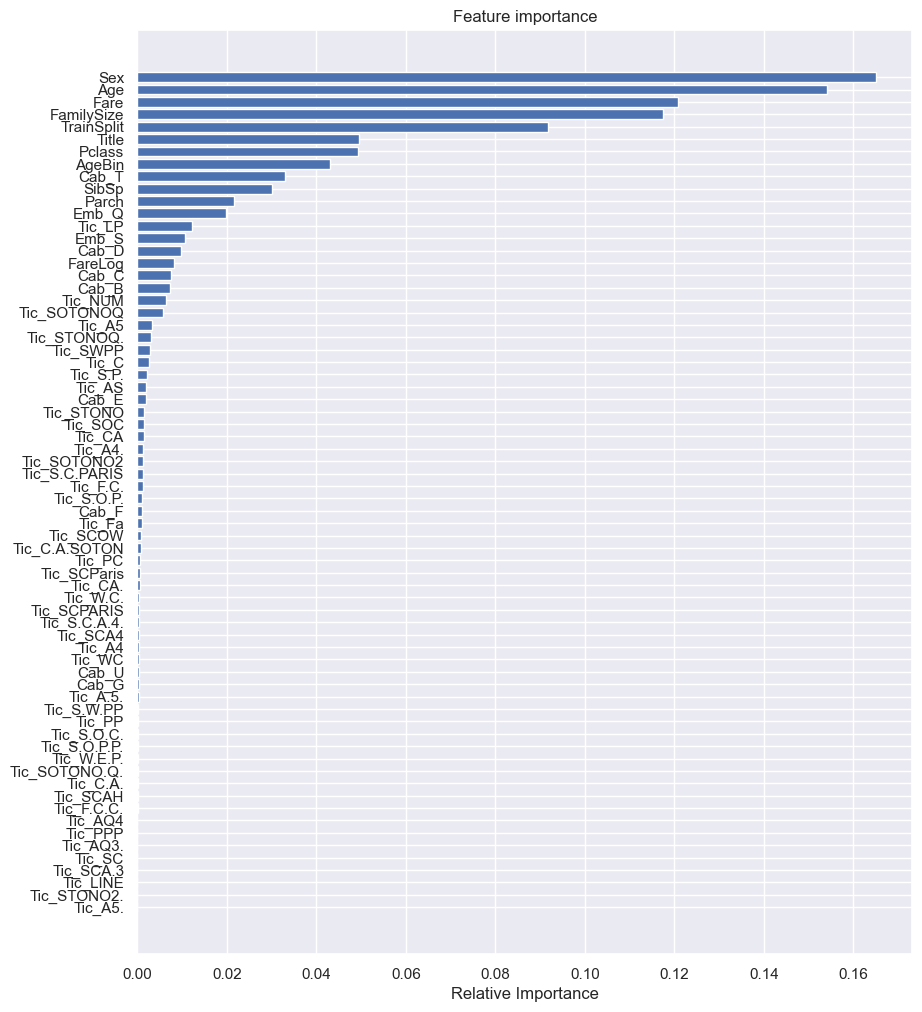

In [89]:
# 랜덤 포레스트 모델의 피처 중요도
rf_model.fit(x_train, y_train)
imp_features, imp_scores = plot_importance(rf_model, selected_features)

In [91]:
selected_features = imp_features[: 10]
y_train = data.loc[data['TrainSplit']=='Train', 'Survived']
x_train = data.loc[data['TrainSplit'] == 'Train', selected_features]
x_test = data.loc[data['TrainSplit'] == 'Test', selected_features]

In [92]:
x_train = x_train.drop(['TrainSplit'], axis=1)
x_test = x_test.drop(['TrainSplit'], axis=1)

In [95]:
rf_model = RandomForestClassifier(random_state=42)
auc_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='roc_auc')
print(np.round(auc_scores, 4))
print(np.round(np.mean(auc_scores), 4))

[0.8519 0.8134 0.9053 0.8416 0.9008]
0.8626


In [98]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=3, random_state=42)
auc_scores = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='roc_auc')
print(np.round(auc_scores, 4))
print(np.round(np.mean(auc_scores), 4))

[0.8721 0.8176 0.9037 0.8668 0.8964]
0.8714


In [102]:
# 확률값 예측
xgb_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
y_xgb_proba = xgb_model.predict_proba(x_test)[:, 1]
y_rf_proba = rf_model.predict_proba(x_test)[:, 1]

# 앙상블 기법
y_proba = (y_xgb_proba + y_rf_proba) /2 
print(y_proba.shape)
# submission['Survived'] = y_proba

(418,)
